In [1]:
# Importing the required libraries - NumPy, Pandas, Matplotlib and Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Read the Part1_data file into a DataFrame
df = pd.read_csv('Part1_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-10-2010,157.080002,157.440002,152.199997,153.710007,153.710007,8683400
1,04-10-2010,153.949997,155.960007,152.789993,155.389999,155.389999,5346500
2,05-10-2010,157.080002,161.210007,157.009995,160.869995,160.869995,5620000
3,06-10-2010,160.600006,160.679993,154.600006,155.399994,155.399994,6060800
4,07-10-2010,156.509995,157.399994,153.389999,156.270004,156.270004,4622000


## Question 1: Highest Closing Price

On which date were the highest closing prices observed in the provided stock data for Amazon?


In [3]:
# Find the date for the highest closing price
max_close_date = df[df['Close'] == df['Close'].max()]['Date'].iloc[0]
print(max_close_date)

02-09-2020


## Question 2: Positive Daily Returns

Positive daily returns refer to the situation where the closing price of a financial asset, such as a stock, is higher at the end of a trading day compared to the opening price of that day. Positive daily returns indicate that the asset's price has increased during that particular trading day. They convey information about profitability, market sentiment, and the performance of individual assets or portfolios, helping investors and analysts make informed decisions in the financial markets.

 Calculate the number of days when the stock's price closed higher than it opened (positive daily returns).

In [4]:
# Calculate the number of days when the closing price was higher than the opening price
positive_daily_returns = df['Close'] > df['Open']
num_days_positive_returns= positive_daily_returns.sum()

In [5]:
print(num_days_positive_returns)

1260


## Question 3: Daily Price Range

The *daily price range* in stocks, also known as the trading range or intraday price range, is the difference between the highest price at which a stock is traded during a given trading day (the "high") and the lowest price at which it is traded during the same day (the "low").

In mathematical terms: `Daily Price Range = High Price - Low Price`

The daily price range provides valuable information to investors and traders about the volatility and price movement of a stock on a particular trading day.

Create a column called "Price Range" which calculates the daily price range for the given stock data. What is the lowest value for this column? (Round off to 2 decimal places)

In [6]:
# Calculate the daily price range
df['Price Range'] = df['High'] - df['Low']

# Find the  lowest jump in price range
lowest_jump_value = df['Price Range'].min()

In [7]:
round(lowest_jump_value,2)

1.34

## Question 4: Percentage change in closing price

The percentage change in the closing price of a stock, is a measure that quantifies the difference between the closing price of the asset on two different dates as a percentage of the earlier closing price. It is commonly used in financial analysis and investment to assess how the price of an asset has changed over a specific period of time.

Mathematically, the formula to calculate the percentage change in closing price is as follows:

`Percentage Change = ((New Closing Price - Old Closing Price) / Old Closing Price) * 100`

Create a new column `Price Change %` that calculates the percentage change in closing price for all the days.

Hint: For creating this column you can use the `.pct_change` method in pandas. Check its documentation for more information https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [8]:
# Calculate percentage change in closing price
df['Price Change %'] = df['Close'].pct_change() * 100
df['Price Change %']

0            NaN
1       1.092962
2       3.526608
3      -3.400262
4       0.559852
          ...   
2512    0.664362
2513    2.494870
2514    2.549818
2515   -0.919020
2516    0.122424
Name: Price Change %, Length: 2517, dtype: float64

**Note** - The first value for this column would be `NaN`. Can you think of a reason why is it so?

Yes, Because there is no prevoius closing price so it will give `NAN`

How many days witnessed a negative percentage change in their closing price?

In [9]:
# No of days with negative price change %
price_negative_changes = df[df['Price Change %'] < 0]

print(price_negative_changes)

            Date         Open         High          Low        Close  \
3     06-10-2010   160.600006   160.679993   154.600006   155.399994   
5     08-10-2010   155.179993   156.279999   152.779999   155.550003   
6     11-10-2010   154.889999   156.630005   152.339996   153.029999   
8     13-10-2010   156.690002   156.789993   153.850006   155.169998   
11    18-10-2010   165.000000   165.190002   161.820007   163.559998   
...          ...          ...          ...          ...          ...   
2506  16-09-2020  3179.989990  3187.239990  3074.149902  3078.100098   
2507  17-09-2020  3009.250000  3029.429932  2972.550049  3008.729980   
2508  18-09-2020  3031.739990  3037.800049  2905.540039  2954.909912   
2511  23-09-2020  3120.429932  3127.000000  2992.379883  2999.860107   
2515  29-09-2020  3175.389893  3188.260010  3132.540039  3144.879883   

        Adj Close   Volume  Price Range  Price Change %  
3      155.399994  6060800     6.079987       -3.400262  
5      155.550003  

### Working with Date-time data in Python

In Python, when working with date-related data in a DataFrame using Pandas, you often need to convert date strings to datetime objects and extract specific components like the year, month, day, etc.. Before proceeding further, you will create a new column `Year` which extracts the year from the `Date` column.
Here's how you can perform the above operation:

- To convert a column containing date strings to datetime objects, you can use the `pd.to_datetime()` function.

- Once the `Date` column is converted to datetime objects, you can extract the year from it using the `.dt.year` attribute and store it in the `Year` column

In [10]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [11]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [12]:
# Check the dataframe again
# You would notice the Year column now
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change %,Year
0,2010-10-01,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,5.240005,NaN,2010
1,2010-10-04,153.949997,155.960007,152.789993,155.389999,155.389999,5346500,3.170014,1.092962,2010
2,2010-10-05,157.080002,161.210007,157.009995,160.869995,160.869995,5620000,4.200012,3.526608,2010
3,2010-10-06,160.600006,160.679993,154.600006,155.399994,155.399994,6060800,6.079987,-3.400262,2010
4,2010-10-07,156.509995,157.399994,153.389999,156.270004,156.270004,4622000,4.009995,0.559852,2010


## Question 5: Total Trading Volume  

Note that the `Volume` column denotes the total number of shares of the company's stock that were traded on that day. Let's say you want to calculate the total trading volume for each year in the data set (2010-2020)

Which year had the highest total trading volume?

In [13]:
# Group the data by year and calculate the total volume for each year
yearly_total_volume = df.groupby(['Year'])['Volume'].sum()

# Find the year with the maximum total volume
year_with_max_volume = yearly_total_volume.idxmax()

In [14]:
year_with_max_volume

2011

## Question 6: Average Closing Price for 2015

Calculate the average closing price for the year 2015 (Round off to 2 decimal places)

In [15]:
# Group data by year and calculate average closing price
yearly_average_close = df.groupby(['Year'])['Close'].mean()

In [16]:
# Average closing price for the year 2015
average_closing_price_2015 = yearly_average_close[2015]

In [17]:
round(average_closing_price_2015,2)

478.14

## Question 7 : Bar Chart

In the previous question, you had calculated the average closing price for 2015. Now let's dive a bit deeper.

Use a bar chart to find which month in 2015 had the least average closing price.

The bar chart should contain the following:

- Months along the X-axis
- Average closing price along the Y-axis
- Each bar should be labeled with the average closing price

**Hint**: Before solving this question, you also have to create a new column `Month` from the `Date` column

In [18]:
# Create the Month column
df['Month'] = df['Date'].dt.month

In [19]:
# Check the dataframe again
# There should be a Month column now
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change %,Year,Month
0,2010-10-01,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,5.240005,NaN,2010,10
1,2010-10-04,153.949997,155.960007,152.789993,155.389999,155.389999,5346500,3.170014,1.092962,2010,10
2,2010-10-05,157.080002,161.210007,157.009995,160.869995,160.869995,5620000,4.200012,3.526608,2010,10
3,2010-10-06,160.600006,160.679993,154.600006,155.399994,155.399994,6060800,6.079987,-3.400262,2010,10
4,2010-10-07,156.509995,157.399994,153.389999,156.270004,156.270004,4622000,4.009995,0.559852,2010,10


In [20]:
# Filter the data for the year 2015
df_2015 = df[df['Year'] == 2015]

In [21]:
# Group the data by month and calculate the average closing price for each month
monthly_avg_closing_prices_2015 = df_2015.groupby('Month')['Close'].mean()

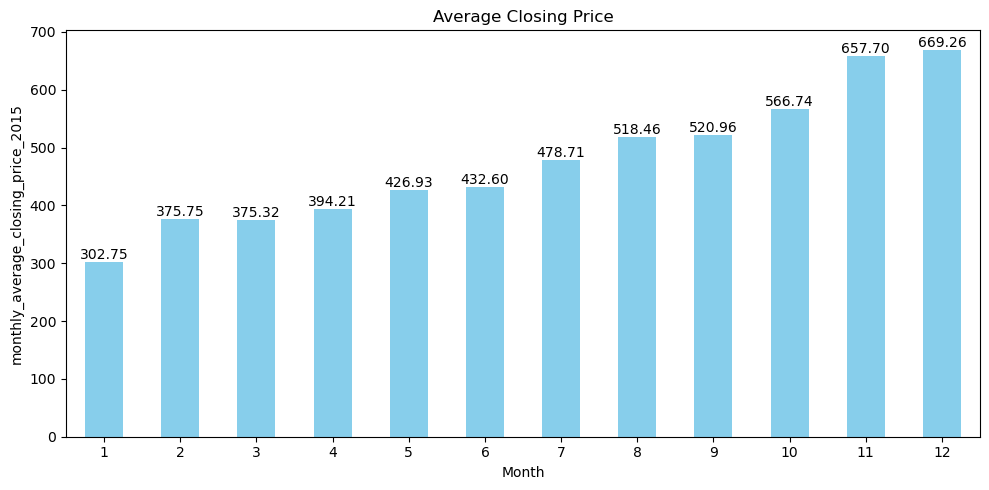

In [22]:
# Create a bar plot
# Months along the X-axis
# Average closing price along the Y-axis
# Each bar should be labeled with the average closing price
plt.figure(figsize=(10, 5))
ax = monthly_avg_closing_prices_2015.plot(kind='bar',color='skyblue')
plt.xlabel('Month')
plt.ylabel('monthly_average_closing_price_2015')
plt.title('Average Closing Price')
plt.xticks(rotation=0)

for i, v in enumerate(monthly_avg_closing_prices_2015):
    ax.text(i,v, f'{v:.2f}', ha='center',va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Question 8: Risk

Risk in stocks refers to the uncertainty or variability in the returns that an investor may experience when holding a particular stock. It represents the possibility of both favorable and unfavorable outcomes, including the potential for losses. Understanding and quantifying risk is crucial for investors, as it helps them make informed investment decisions and manage their portfolios effectively.

**Standard deviation** measures the dispersion or spread of a stock's returns around its average or expected return. A higher standard deviation indicates greater price volatility and is often used as a measure of risk.

In which year did the Amazon stock have the highest level of risk in its closing price?

In [23]:
# Group the data by year Calculate the standard deviation for each year
yearly_std_dev = df.groupby(df['Year'])['Close'].std()

# Year with the maximum risk
max_risk_year = yearly_std_dev.idxmax()

In [24]:
max_risk_year

2020

## Question 9: Candlestick Chart

Candlestick charts are a valuable tool to visually interpret price data, understand market sentiment, and make trading decisions. They provide a concise and intuitive way to analyze historical price movements, identify potential opportunities, and manage risks in the financial markets.

Each candlestick consists of a rectangular "body" and two "wicks" or "shadows" extending from the top and bottom of the body. The body represents the price range between the opening and closing prices for a specific time period.
Stock-trading apps use candlestick charts extensively for analyzing trends in stock prices. These candlesticks are usually color-coded.

- A green or white candlestick typically indicates that the closing price was higher than the opening price, suggesting bullish (positive) sentiment.
- Conversely, a red or black candlestick represents a closing price lower than the opening price, signaling bearish (negative) sentiment.


You can read more about candlestick charts from this [link](https://www.investopedia.com/articles/active-trading/062315/using-bullish-candlestick-patterns-buy-stocks.asp).

A sample candlestick chart is shown below:


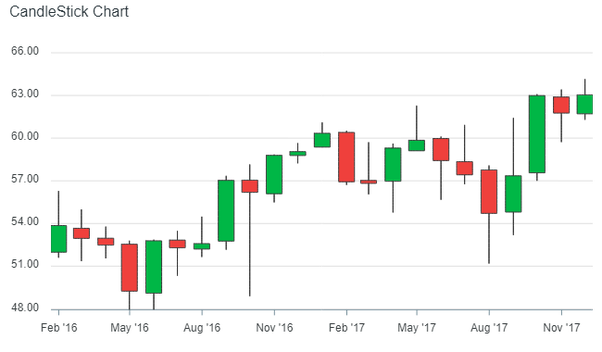

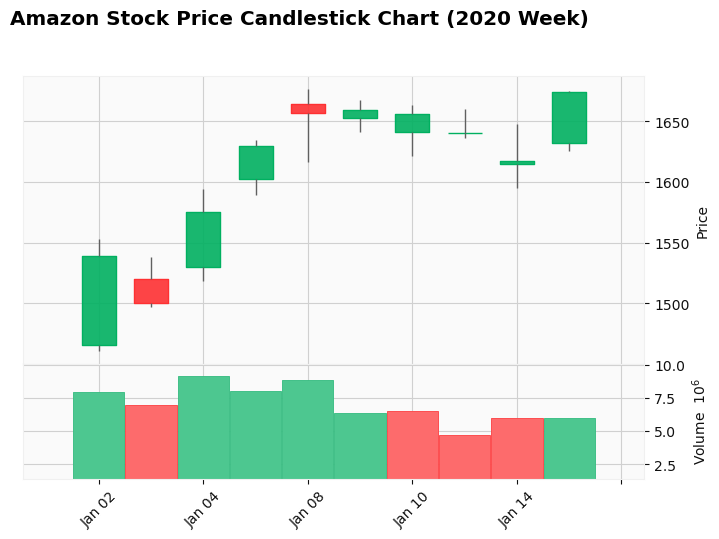

In [25]:
# Create a candlestick chart for the given data
# Set the date column as the index
df.set_index('Date', inplace=True)

# Define the date range for the week in 2020 you want to visualize
start_date = '2019-01-01'
end_date = '2019-01-15'

# Create a subset of the data for the specified date range
df_subset = df[(df.index >= start_date) & (df.index <= end_date)]

# Create a candlestick chart for the subset of data
mpf.plot(df_subset, type='candle', title='Amazon Stock Price Candlestick Chart (2020 Week)',
     	ylabel='Price', volume=True, style='yahoo', figratio=(12, 8))

# Part 2: Stock Data Analysis for Multiple Stocks

In the next part of the assignment, you would be analyzing stocks from multiple companies - Apple (AAPL), Amazon(AMZN), Google (GOOG), Merck (MRK) and United Health(UNH). To keep things simple, we will only focus on the Closing Prices of all these stocks across a period of 10 years from 1st October 2010 to 30th September 2020.


In [26]:
# Read the data
data = pd.read_csv('Part2_data.csv')
data.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOG,Close_MRK,Close_UNH
0,01-10-2010,10.090000,153.710007,261.828613,36.599998,35.430000
1,04-10-2010,9.951428,155.389999,260.199707,36.520000,34.540001
2,05-10-2010,10.319285,160.869995,268.110046,37.020000,35.070000
3,06-10-2010,10.328215,155.399994,266.177307,37.009998,33.950001
4,07-10-2010,10.329286,156.270004,264.015411,36.709999,34.340000


Before proceeding further, convert the Date column to Datetime format as you did in Part 1 of this assignment

In [27]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

## Question 1 : Line Chart

Create a Line Chart depicting closing prices over time (2010-2020) for all the companies - AAPL, AMZN, GOOG, MRK, and UNH


Here's how your line chart should look like:

- Date should be along the X-axis
- The line chart depicting the stock price should be along the Y-axis
- The line charts for all the companies should be in the same view. Each company's line chart should be in a different color

Based on the line chart , which of the following statements is most accurate?

A) AAPL consistently had the highest closing price throughout the entire period.

B) GOOG had the highest closing price in the initial years but was surpassed by AMZN in the later years.

C) MRK experienced significant fluctuations in closing price compared to the other companies.

D) The closing prices for all companies followed an almost identical trend throughout the entire period.


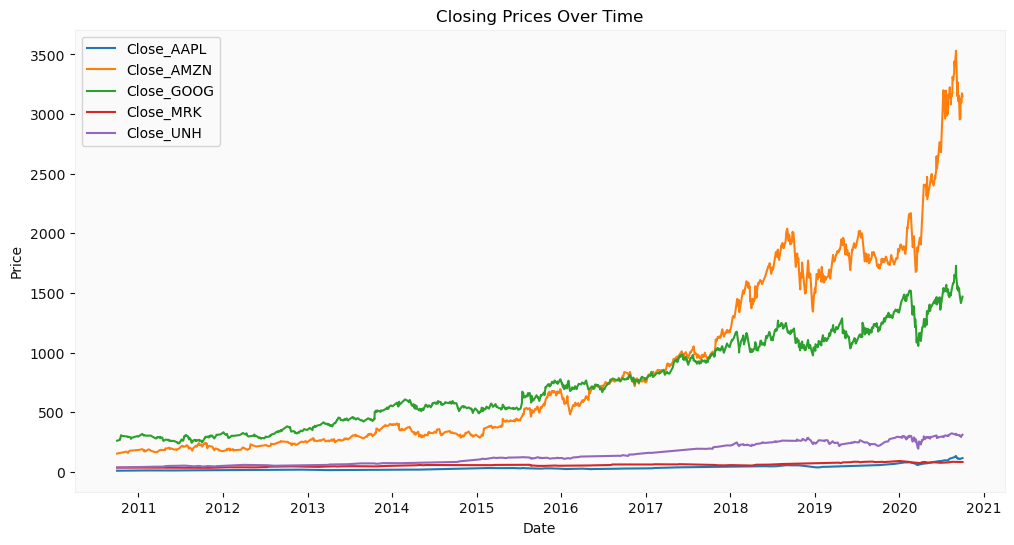

In [28]:
# Plot line charts
# Date should be along the X-axis
# The line chart depicting the stock price should be along the Y-axis
# The line charts for all the companies should be in the same view. Each company's line chart should be in a different color
# Plotting the closing prices over time for all companies
plt.figure(figsize=(12, 6))
for col in ['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_MRK', 'Close_UNH']:
	plt.plot(data['Date'], data[col], label=col)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)
plt.legend()
plt.show()

## Question 2: Scatter Plot

Scatter Plots are pretty useful in analyzing the relationship between 2 numeric variables. It indicates whether changes in one variable are related to, or can predict, changes in another variable. Or in other words, you can identify the correlation (either positive or negative) between the two variables.

Create a scatter plot to determine the type of correlation that exists between the stock prices of `AAPL` and `AMZN`

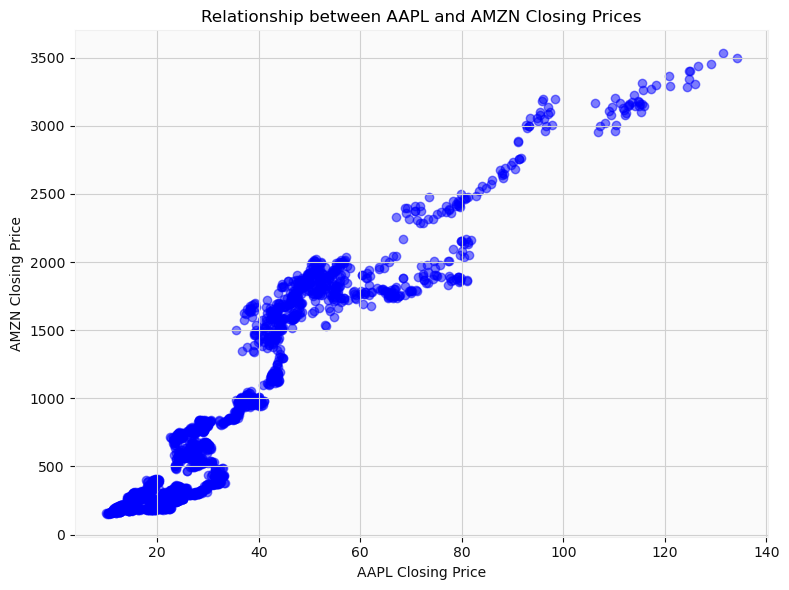

In [29]:
# Create a scatterplot to visualize the relationship between AAPL and AMZN closing prices
plt.figure(figsize=(8, 6))

# Scatter plot of AAPL vs AMZN closing prices
plt.scatter(data['Close_AAPL'], data['Close_AMZN'], color='blue', alpha=0.5)

plt.title('Relationship between AAPL and AMZN Closing Prices')
plt.xlabel('AAPL Closing Price')
plt.ylabel('AMZN Closing Price')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()

# Show the plot
plt.show()

Since the above chart only helps us in visualizing the correlation between two stocks, we can go for another interesting plot which would enable us to analyse the correlation of stocks for different companies all at once. This is very useful in finance world, as you can identify which stocks to buy for building your portfolio

## Question 3: Correlation Heatmap

A correlation matrix is a square matrix that quantifies the pairwise relationships between variables in a dataset, with values ranging from -1 to 1, indicating the strength and direction of associations between the different variables

Heatmaps are a data visualization technique used to represent the distribution, density, or intensity of a phenomenon across a two-dimensional space. Heatmaps are typically presented as a grid of colored cells or rectangles, with each cell's color indicating the value of the underlying data at that specific location.

You can combine the above two and create a correlation heatmap to analyze the correlations between the stock prices of all the companies in a single view.

Create a correlation heatmap to determine which among the following pairs of stocks depict the highest correlation between them. Here are some additional instructions on how to build the heatmap

- The heatmap should have a single color mapping
- Different shades of the same color should indicate the value represented in each cell of the heatmap (the darker the shade, the higher the value)

A) GOOG, UNH

B) AAPL, AMZN

C) MRK, UNH

D) GOOG, AAPL

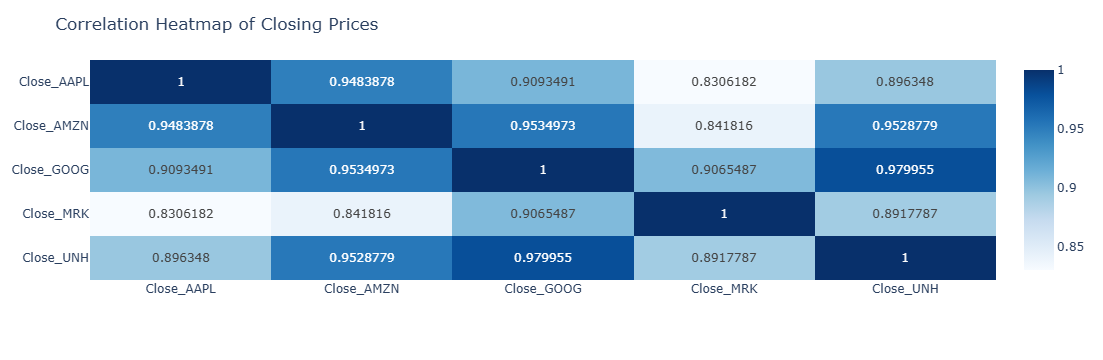

In [33]:
corr_matrix = data[['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_MRK', 'Close_UNH']].corr()

# Plot the heatmap using Plotly
fig = px.imshow(corr_matrix, text_auto=True, aspect='auto', color_continuous_scale='Blues')
fig.update_layout(title='Correlation Heatmap of Closing Prices')
fig.show()